# Step8 演習05 ニューラルネットワークを使った画像認識
---

Step8 演習05 ではニューラルネットワークを使った画像認識に取り組みます。

画像データは配列で与えられます。

例えば縦が10ピクセル、横が10ピクセルの場合、全部で100ピクセルの画像になるため、100個のデータを持つ配列になります。

これから見るデータは「0」と「1」のデータが１００個並んだ１次元配列で縦が10ピクセル、横が10ピクセルの画像データを表しています。

本演習では、Step8 演習03 と同様のデータセットを使います。

ただし、Step8 演習03 で行った数字の分類はscikit-learnのMLPClassifierを利用しました。

ここでは、バックプロバゲーションを実装した自前のニューラルネットワークを用いて分類してみましょう。

**はじめに**

- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**

- ニューラルネットワークを使った画像認識に取り組む。
- ニューラルネットワークのモデルを構築し、自前のフォワードプロパゲーション・バックプロパゲーションで学習・分類を行う。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [NumPy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [scikit-learn](http://scikit-learn.org/stable/index.html) Pythonのオープンソース機械学習ライブラリの公式ドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 画像のデータセットを準備

下のセルをそのまま実行してください。数字０から３の画像データを用意しました。

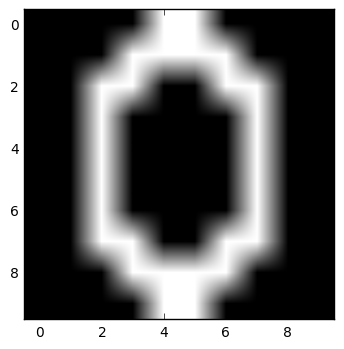

In [2]:
n0 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
n0 = np.array(n0, dtype = np.uint8)
n0 = n0.reshape(10, 10, 1)
plt.imshow(n0[:,:,0], cmap = 'gray')
plt.show()

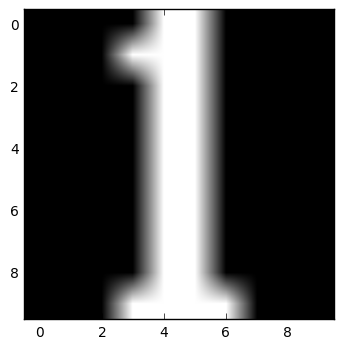

In [3]:
n1 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
n1 = np.array(n1, dtype = np.uint8)
n1 = n1.reshape(10, 10, 1)
plt.imshow(n1[:,:,0], cmap = 'gray')
plt.show()

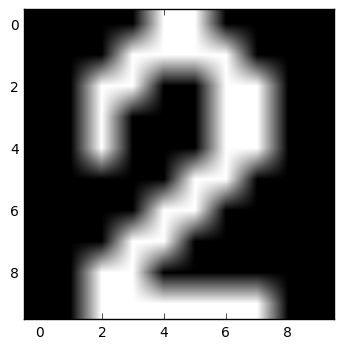

In [4]:
n2 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
n2 = np.array(n2, dtype = np.uint8)
n2 = n2.reshape(10, 10, 1)
plt.imshow(n2[:,:,0], cmap = 'gray')
plt.show()

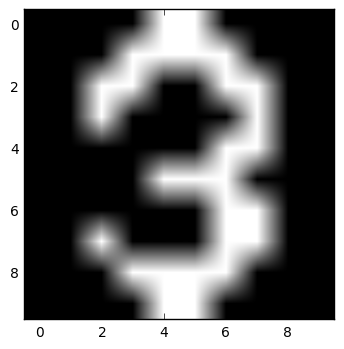

In [5]:
n3 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
          0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
n3 = np.array(n3, dtype = np.uint8)
n3 = n3.reshape(10, 10, 1)
plt.imshow(n3[:,:,0], cmap = 'gray')
plt.show()

これらの画像データをニューラルネットワークを使って分類できることを確認しましょう。

## 画像（数字）を分類する

各画像の入力データ $x$ はずらりと並んだ１００個の数値です。

一旦１０x１０x１の多次元配列に変換した画像データは flatten() という関数を使うと１次元配列に戻ります。

そうして作ったデータを入力 $x$ として使いましょう。

In [6]:
X = np.array([n0.flatten(), n1.flatten(), n2.flatten(), n3.flatten()])

下のセルを実行して、flatten() した結果を格納した  x  のshapeを確認しましょう。

In [7]:
X.shape

(4, 100)

### 正解ラベルを準備しよう

ラベル $y$  として、マルチクラス分類で用いられる「one-hotエンコーディング」を使うことにします。

ここでは先ほど準備した１０x１０x１の画像の数字０から３のラベルを用意します。

- 数字が０の場合は y = [1, 0, 0, 0]
- 数字が１の場合は y = [0, 1, 0, 0]
- 数字が２の場合は y = [0, 0, 1, 0]
- 数字が３の場合は y = [0, 0, 0, 1]

というように、対応する場所だけが「1」で、それ以外は「0」の配列としてone-hotエンコーディングします。

In [8]:
y = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

## ニューラルネットワークのモデル

Step8 演習04 で構築したニューラルネットワークのモデルは、

- 入力層のニューロン数 2個
- 隠れ層のニューロン数 10個
- 出力層のニューロン数 2個

上記のようなニューラルネットワークのモデルでした。

本演習では、入力データ $x$ は画像で100次元になっています。さらに、4つのクラスに分類するマルチクラス分類問題です。

ここでは下記の条件で、ニューラルネットワークのモデルを構築します：

- 入力層のニューロン数 100個
- 隠れ層のニューロン数 10個
- 出力層のニューロン数 4個

入力が１００個、出力が４個のニューラルネットワークモデルとします。

入力層の次元の数が増え、出力層の次元の数が増えた場合、実装方法はどのように変わるのか意識しながら進めてください。

In [9]:
# ニューラルネットワークの構造を決める
input_size = 100
hidden_size = 10
output_size = 4

### パラメータの初期化

各パラメータに設定する値（初期値）を乱数で与えます。

In [10]:
W1 = np.random.randn(input_size,hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size,output_size)
b2 = np.zeros((1, output_size))

各パラメータのシェイプと値を確認してみましょう。

In [11]:
print('W1:', W1.shape)
print('b1:', b1.shape)
print('W2:', W2.shape)
print('b2:', b2.shape)
print('W1:', W1)
print('b1:', b1)
print('W2:', W2)
print('b2:', b2)

W1: (100, 10)
b1: (1, 10)
W2: (10, 4)
b2: (1, 4)
W1: [[ 1.67018595e-01 -5.73183990e-01 -3.45366593e-01  8.42208570e-01
   6.01675492e-01 -8.21331614e-01  4.35003287e-01 -5.76375047e-01
   1.36368374e+00  7.68133833e-01]
 [-4.20325869e-01  9.13280601e-01  4.91122219e-01  1.13802238e+00
   6.52637487e-01 -1.70646697e-02  1.06688464e-01 -7.92618550e-02
   1.83810471e+00 -6.90209285e-01]
 [ 1.36625820e+00  6.39989209e-01 -1.10419374e+00  1.12322024e+00
  -9.89978180e-01 -1.13552851e+00  1.06994458e+00  8.55893650e-01
  -7.05532592e-01 -1.60989114e-01]
 [-1.59940385e+00 -1.03871486e+00 -8.72017547e-01 -2.45643521e-01
   8.00469507e-01 -1.99441282e-01 -1.51690015e+00  2.33126320e-01
   1.40802460e-02 -5.82403539e-01]
 [ 4.71731272e-01  7.95654998e-01  5.63115674e-02  1.15947266e-01
   7.96453237e-01  9.92738763e-01 -6.86264488e-02 -1.40950504e+00
   6.30957877e-01 -1.21539835e+00]
 [-6.07915814e-02 -7.48382590e-01 -2.14247864e+00 -7.34765908e-01
  -1.20958698e-01 -5.78123501e-01 -4.72634637e

入力と出力の次元数が増えたことにより、より多くのパラメータを用いてモデルの学習を進めることになります。

### 活性化関数

ニューラルネットワークのモデルで利用する活性化関数を下記のように実装します。

In [12]:
# relu関数
def relu(x):
    return np.maximum(0, x)
    
# relu関数の微分
def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x
    
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True) 

## ニューラルネットワークのモデル

**Setp8 演習04 （発展課題）マルチクラス問題を解く** で紹介したコードを下のセルに書いています。

まったく同じコードです。変わったのは、**データセット**と**モデルの構造**だけです。

では、実際に学習がうまく進むのか下のセルを実行して確認してみましょう。

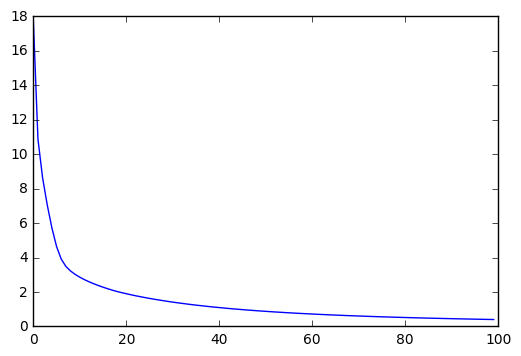

In [13]:
# ニューラルネットワークの構造を決める
input_size = 100
hidden_size = 10
output_size = 4

# 初期値設定（乱数で与える）
W1 = np.random.randn(input_size,hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size,output_size)
b2 = np.zeros((1, output_size))

# 学習率
learning_rate = 0.01

# setup parameters for batch operation
epochs = 100

cost = []
for _ in range(epochs):
    #　フォワードプロパゲーション
    layer1_z = np.dot(X, W1) + b1 
    layer1_a = relu(layer1_z)          # relu activation

    layer2_z = np.dot(layer1_a, W2) + b2
    layer2_a = softmax(layer2_z)       # softmax

    output = layer2_a                  # layer2_a is the output

    # Compute cost (Softmax Cross Entropy)
    cost.append(-np.sum(y * np.log(output)))

    #　バックプロパゲーション
    delta2 = (output - y) / 4
    delta_W2 = np.dot(layer1_a.T, delta2) 
    delta_b2 = np.sum(delta2, axis=0 ,keepdims=True)

    delta1 = np.dot(delta2, W2.T) * relu_derivative(layer1_z)
    delta_W1 = np.dot(X.T, delta1) 
    delta_b1 = np.sum(delta1, axis=0 ,keepdims=True)

    # Update Parameters
    W2 = W2 - learning_rate * delta_W2
    b2 = b2 - learning_rate * delta_b2
    W1 = W1 - learning_rate * delta_W1
    b1 = b1 - learning_rate * delta_b1

plt.plot(cost)
plt.show()

### 学習結果を確認

自前のニューラルネットワークで分離できていることを確認しましょう。

下のセルを実行し、出力を確認してみてください。

In [14]:
#　フォワードプロパゲーション
X = np.array([n0.flatten(), n1.flatten(), n2.flatten(), n3.flatten()])

layer1_z = np.dot(X, W1) + b1 
layer1_a = relu(layer1_z)          # relu activation

layer2_z = np.dot(layer1_a, W2) + b2
layer2_a = softmax(layer2_z)       # softmax

output = layer2_a                  # layer2_a is the output

print(output)

[[8.35212799e-01 3.86287039e-08 4.30052444e-03 1.60486638e-01]
 [6.86488567e-06 9.91465141e-01 7.21041493e-20 8.52799376e-03]
 [1.61603983e-02 2.29781734e-05 9.82471320e-01 1.34530313e-03]
 [1.62084726e-01 1.50129407e-06 1.17565815e-02 8.26157191e-01]]


出力の対角要素がほぼ「１」になっていることが確認できれば正しく学習されています。

下のセルを実行し、「1」が出力されたらうまく分類・学習をすることができています。

In [15]:
np.mean(np.argmax(output, axis=1) == np.argmax(y, axis=1))

1.0

ニューラルネットワークではデータセットが変わった場合、基本的には**モデルの構造を変えるだけ**で学習を実行することができ、今回のデータセットでは学習がうまく進むことを確認しました。

**【課題１０】** scikit-learn 、Python スクラッチで実装したニューラルネットワークの違いを考察してください。

In [16]:
#Coursemale-02 Step8 QuestionNumber10 89b976eca98ec9b0a9ee7f3a6d20a6e0
print("この課題の採点は全員正解とします。")

この課題の採点は全員正解とします。


左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [17]:
%%bash
./validation_client.py male-02 8 10 Step8_05.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



### 学習結果を可視化

学習の結果手に入った係数W1を可視化してみましょう。
配列を10x10にreshapeして画像として表示してみると、うっすらと数字が現れる場合があります。

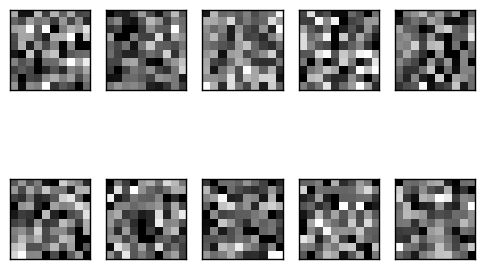

In [18]:
fig, axes = plt.subplots(2, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = W1.min(), W1.max()
for coef, ax in zip(W1.T, axes.ravel()):
    ax.matshow(coef.reshape(10, 10), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())